In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ngs_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\fundamental_analytics\natural_gas\ng_stocks.csv',parse_dates=True,index_col='Week ending')

In [3]:
ngs_df

,Source,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
Week ending,,,,,,,,,
2010-01-01,Derived EIA Weekly Estimates,769,900,195,268,985,159,826,"3,117"
2010-01-08,Derived EIA Weekly Estimates,703,820,185,257,886,123,763,"2,850"
2010-01-15,Derived EIA Weekly Estimates,642,750,176,246,793,91,702,"2,607"
2010-01-22,Derived EIA Weekly Estimates,616,710,171,235,789,102,687,"2,521"
2010-01-29,Derived EIA Weekly Estimates,582,661,164,221,779,108,671,"2,406"
...,...,...,...,...,...,...,...,...,...
2022-12-30,EIA-912,691,839,157,165,"1,040",270,770,"2,891"
2023-01-06,EIA-912,700,823,153,160,"1,067",295,772,"2,902"
2023-01-13,EIA-912,662,785,147,157,"1,069",307,762,"2,820"


In [4]:
ngs_df.columns

Index(['Source', 'East Region', 'Midwest Region', 'Mountain Region',
       'Pacific Region', 'South Central Region', 'Salt', 'NonSalt',
       'Total Lower 48'],
      dtype='object')

In [5]:
cols = ['East Region', 'Midwest Region', 'Mountain Region',
       'Pacific Region', 'South Central Region', 
       'Total Lower 48']



In [6]:
# cols = ['East Region','Mountain Region',
#        'Pacific Region','Salt']

In [7]:
ngs_df['Source'].unique()

array(['Derived EIA Weekly Estimates', 'EIA-912'], dtype=object)

In [8]:
ngs_df = ngs_df[ngs_df['Source']=='Derived EIA Weekly Estimates']

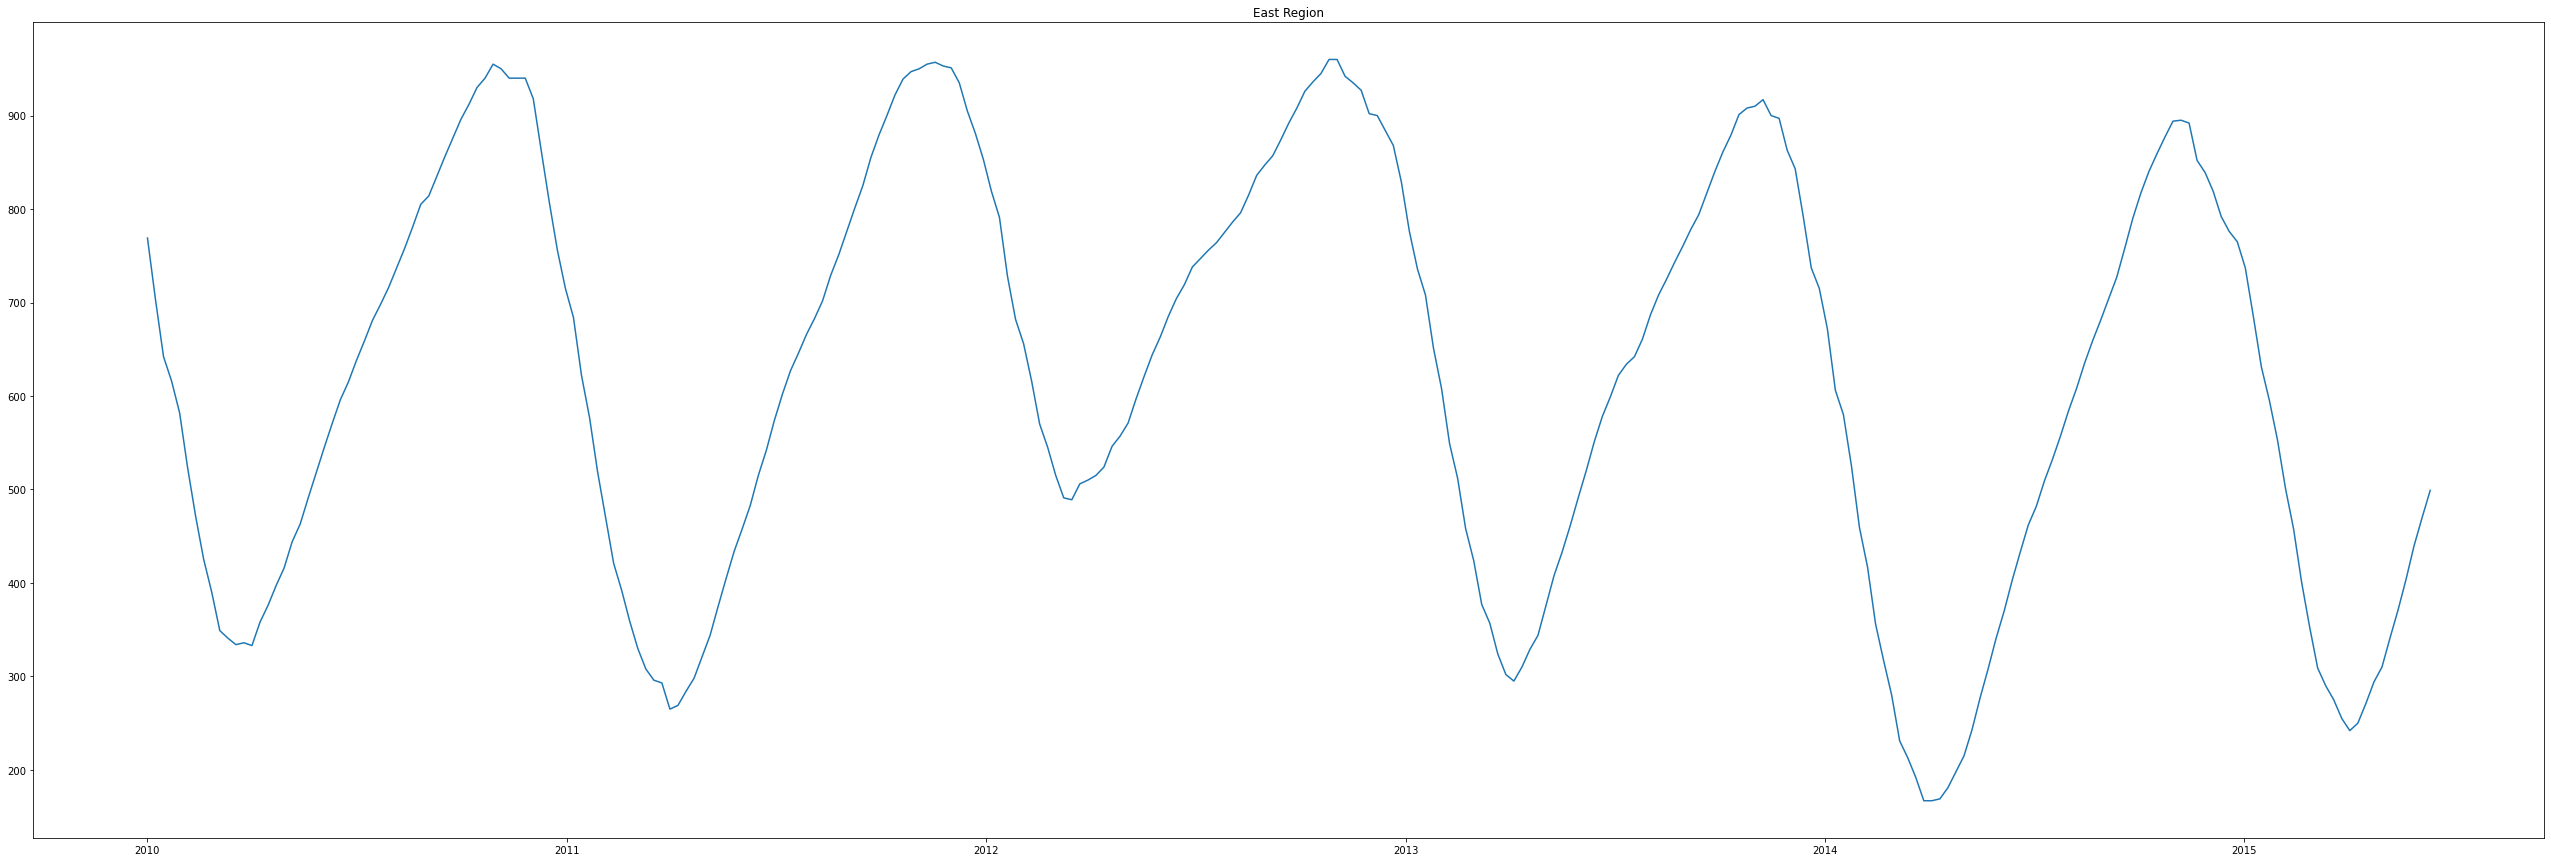

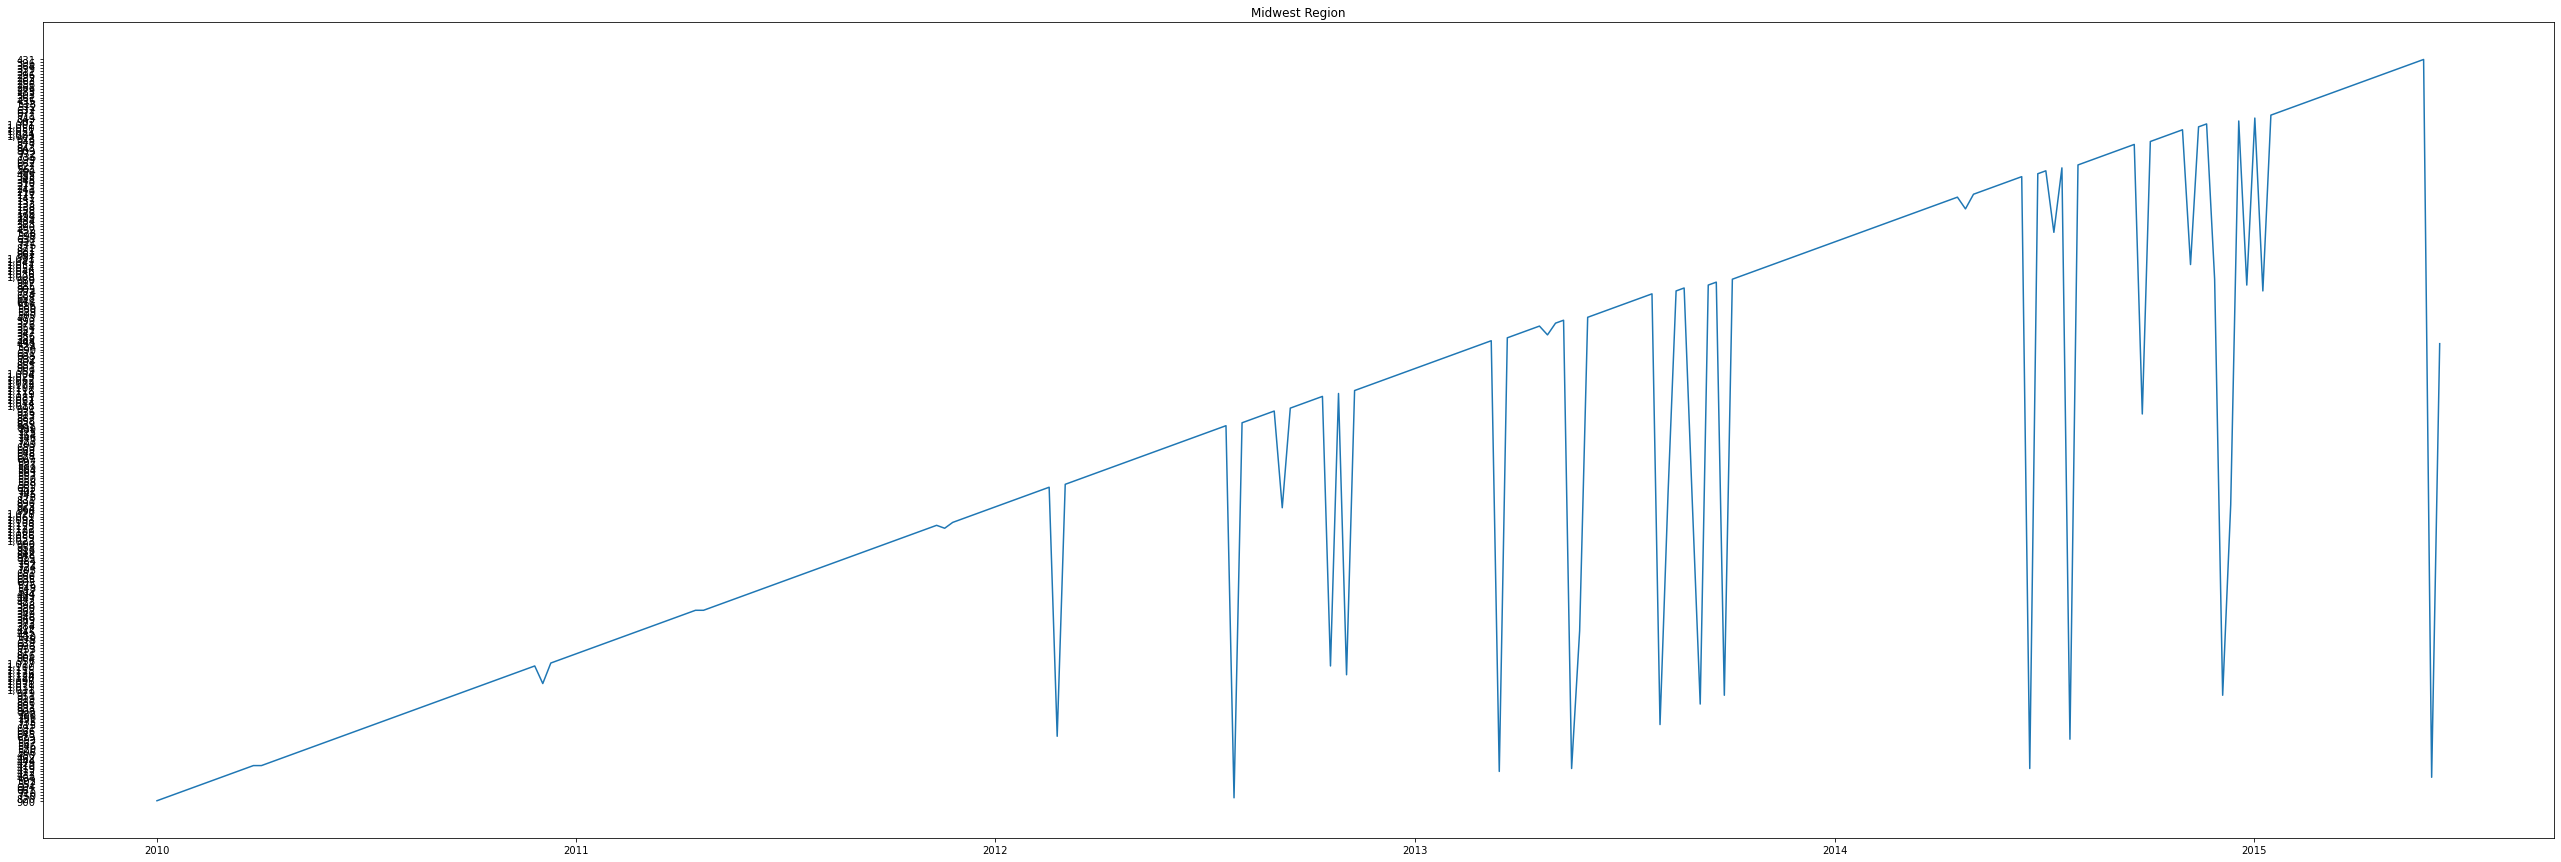

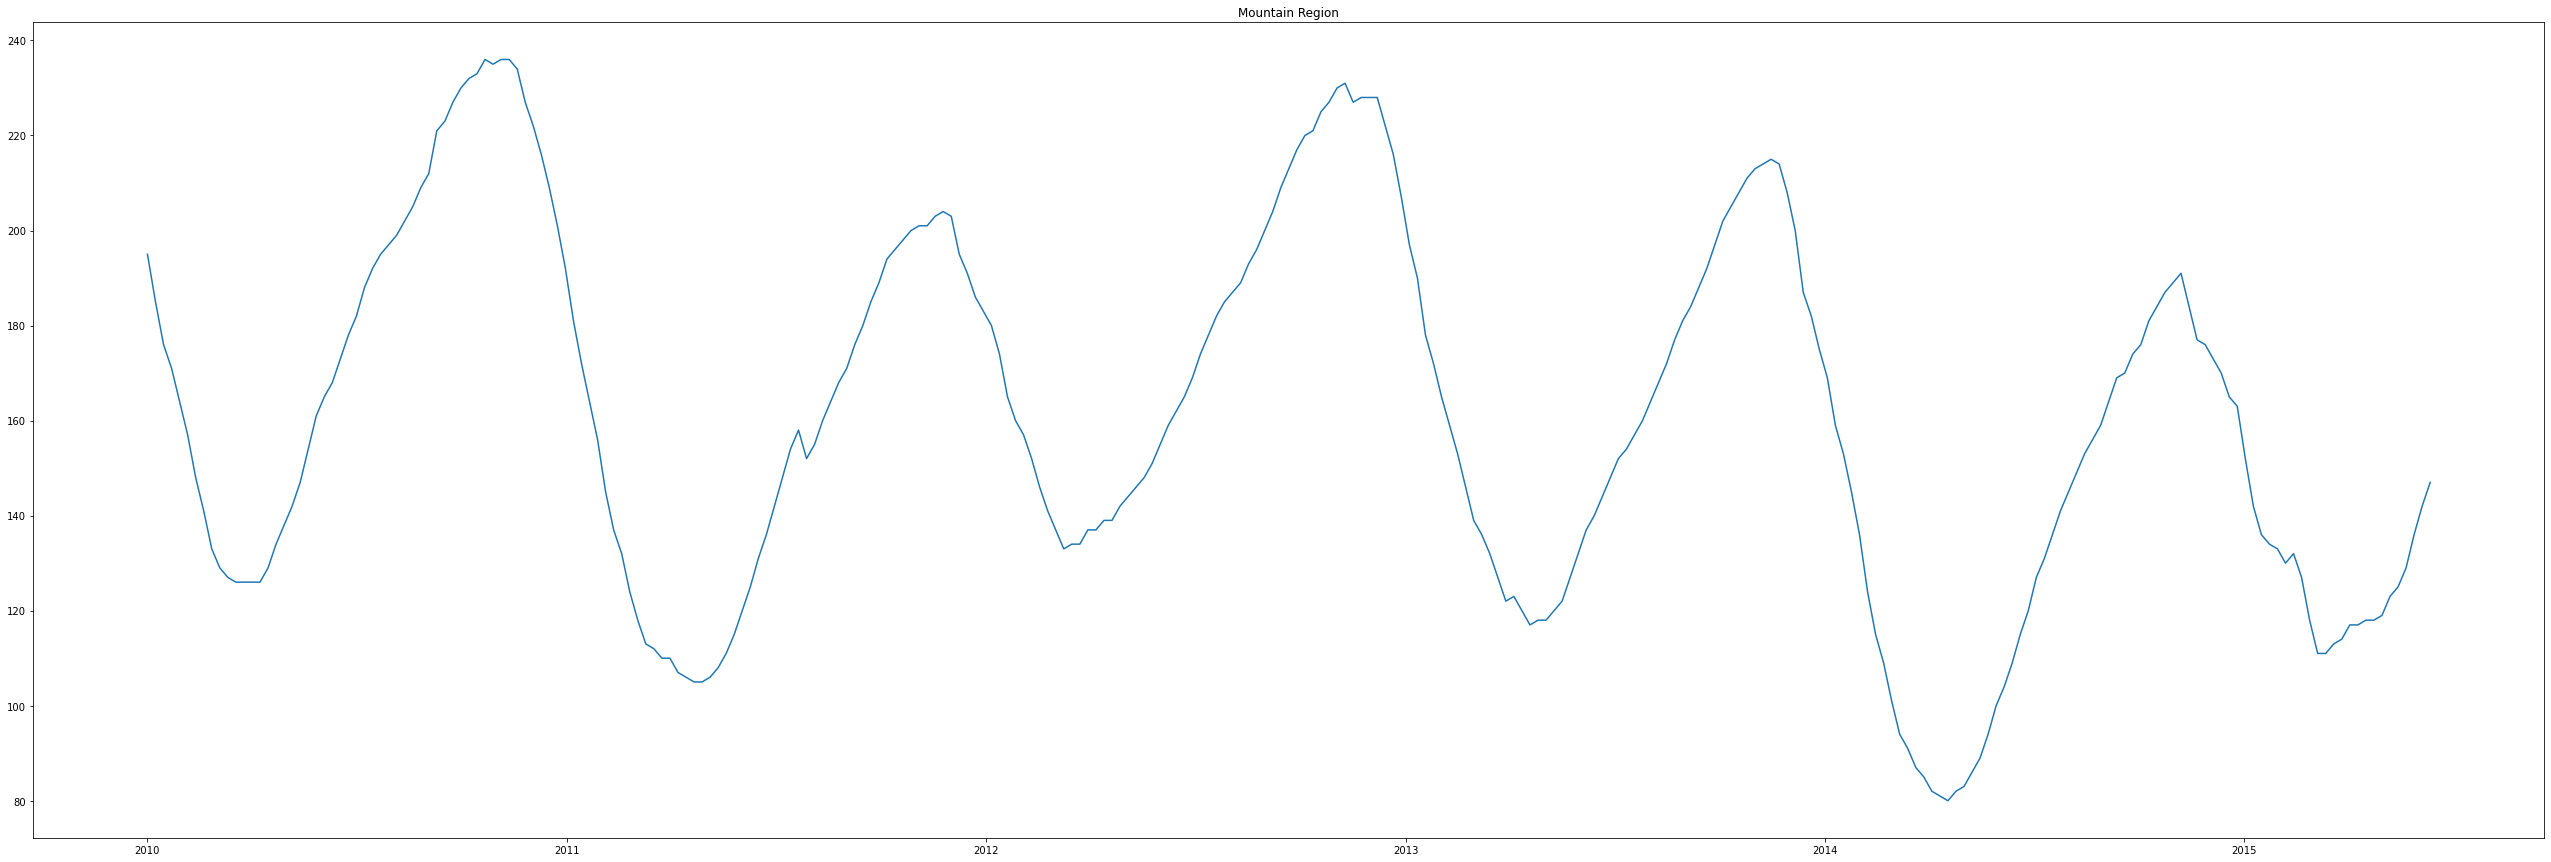

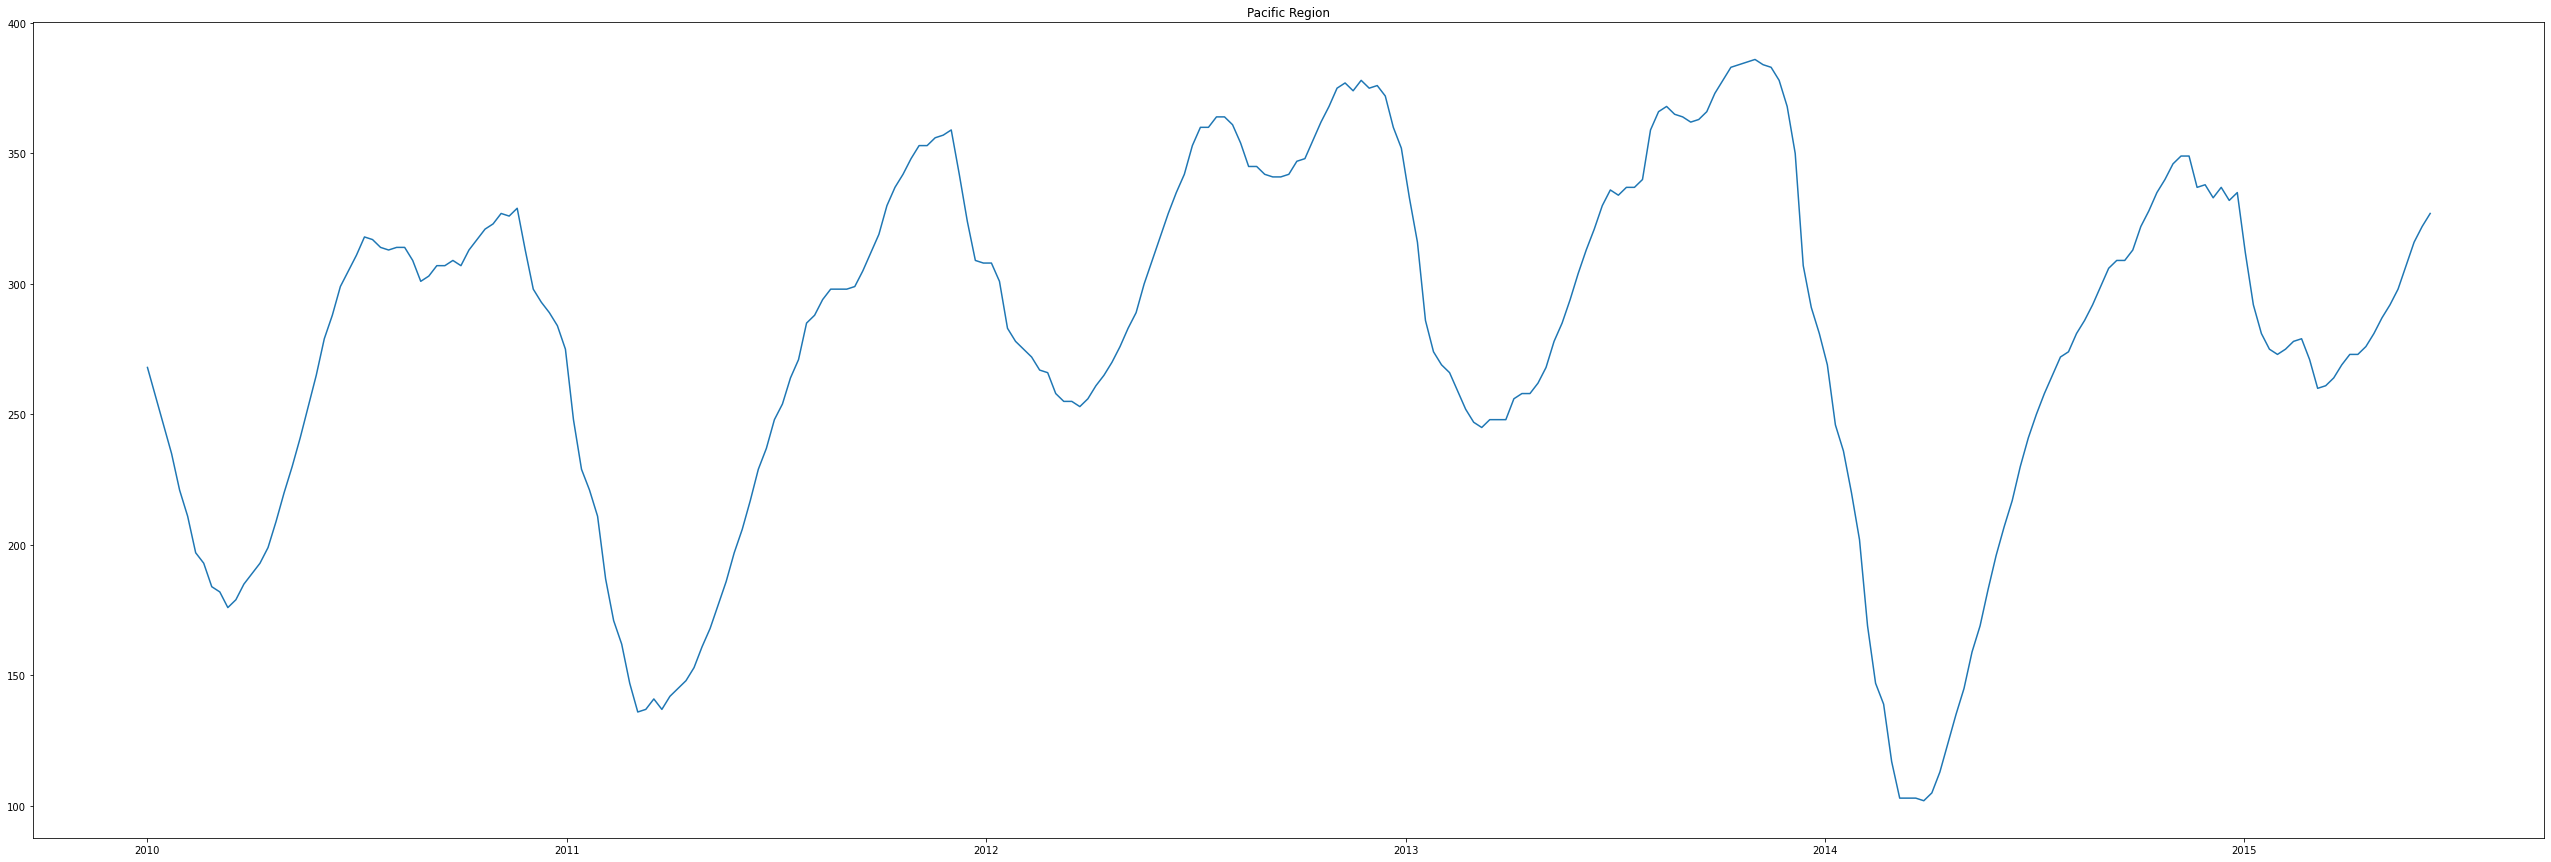

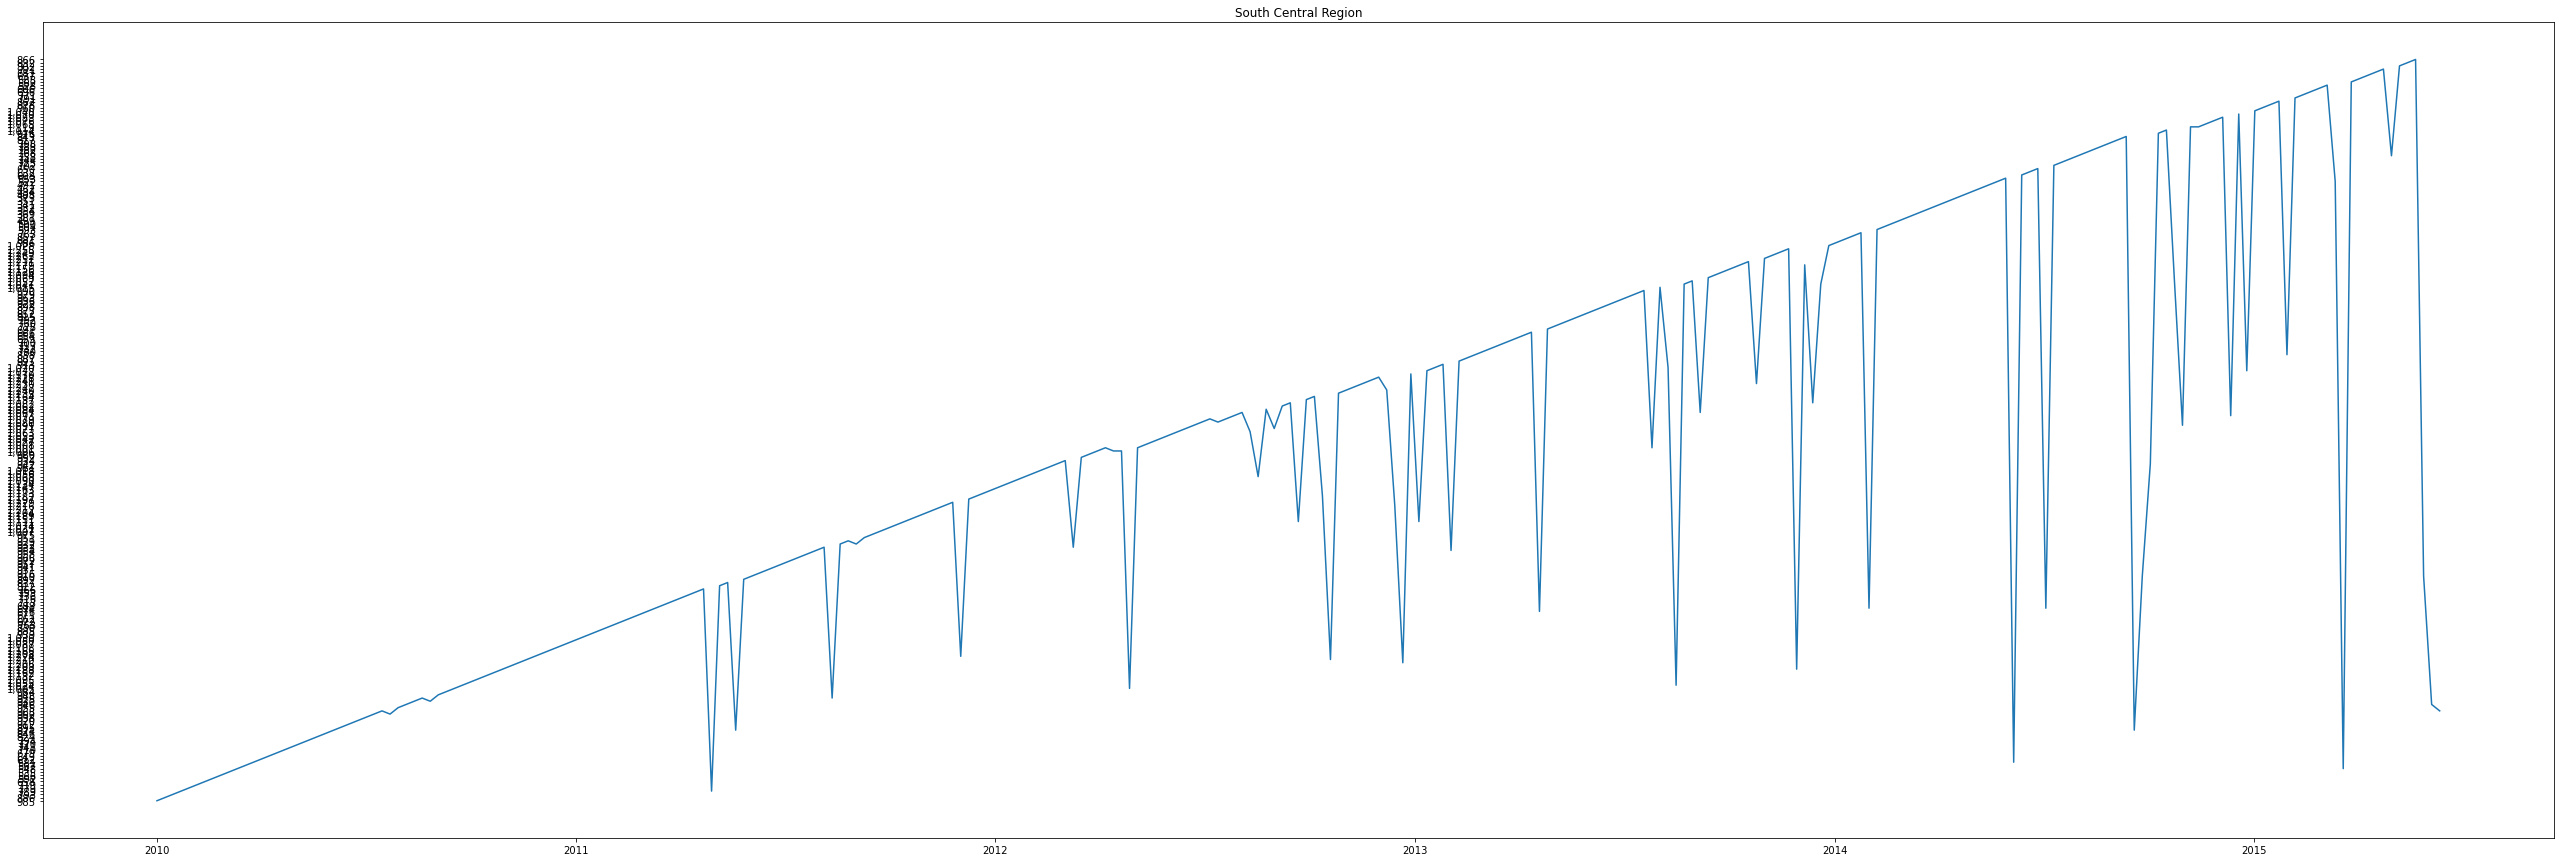

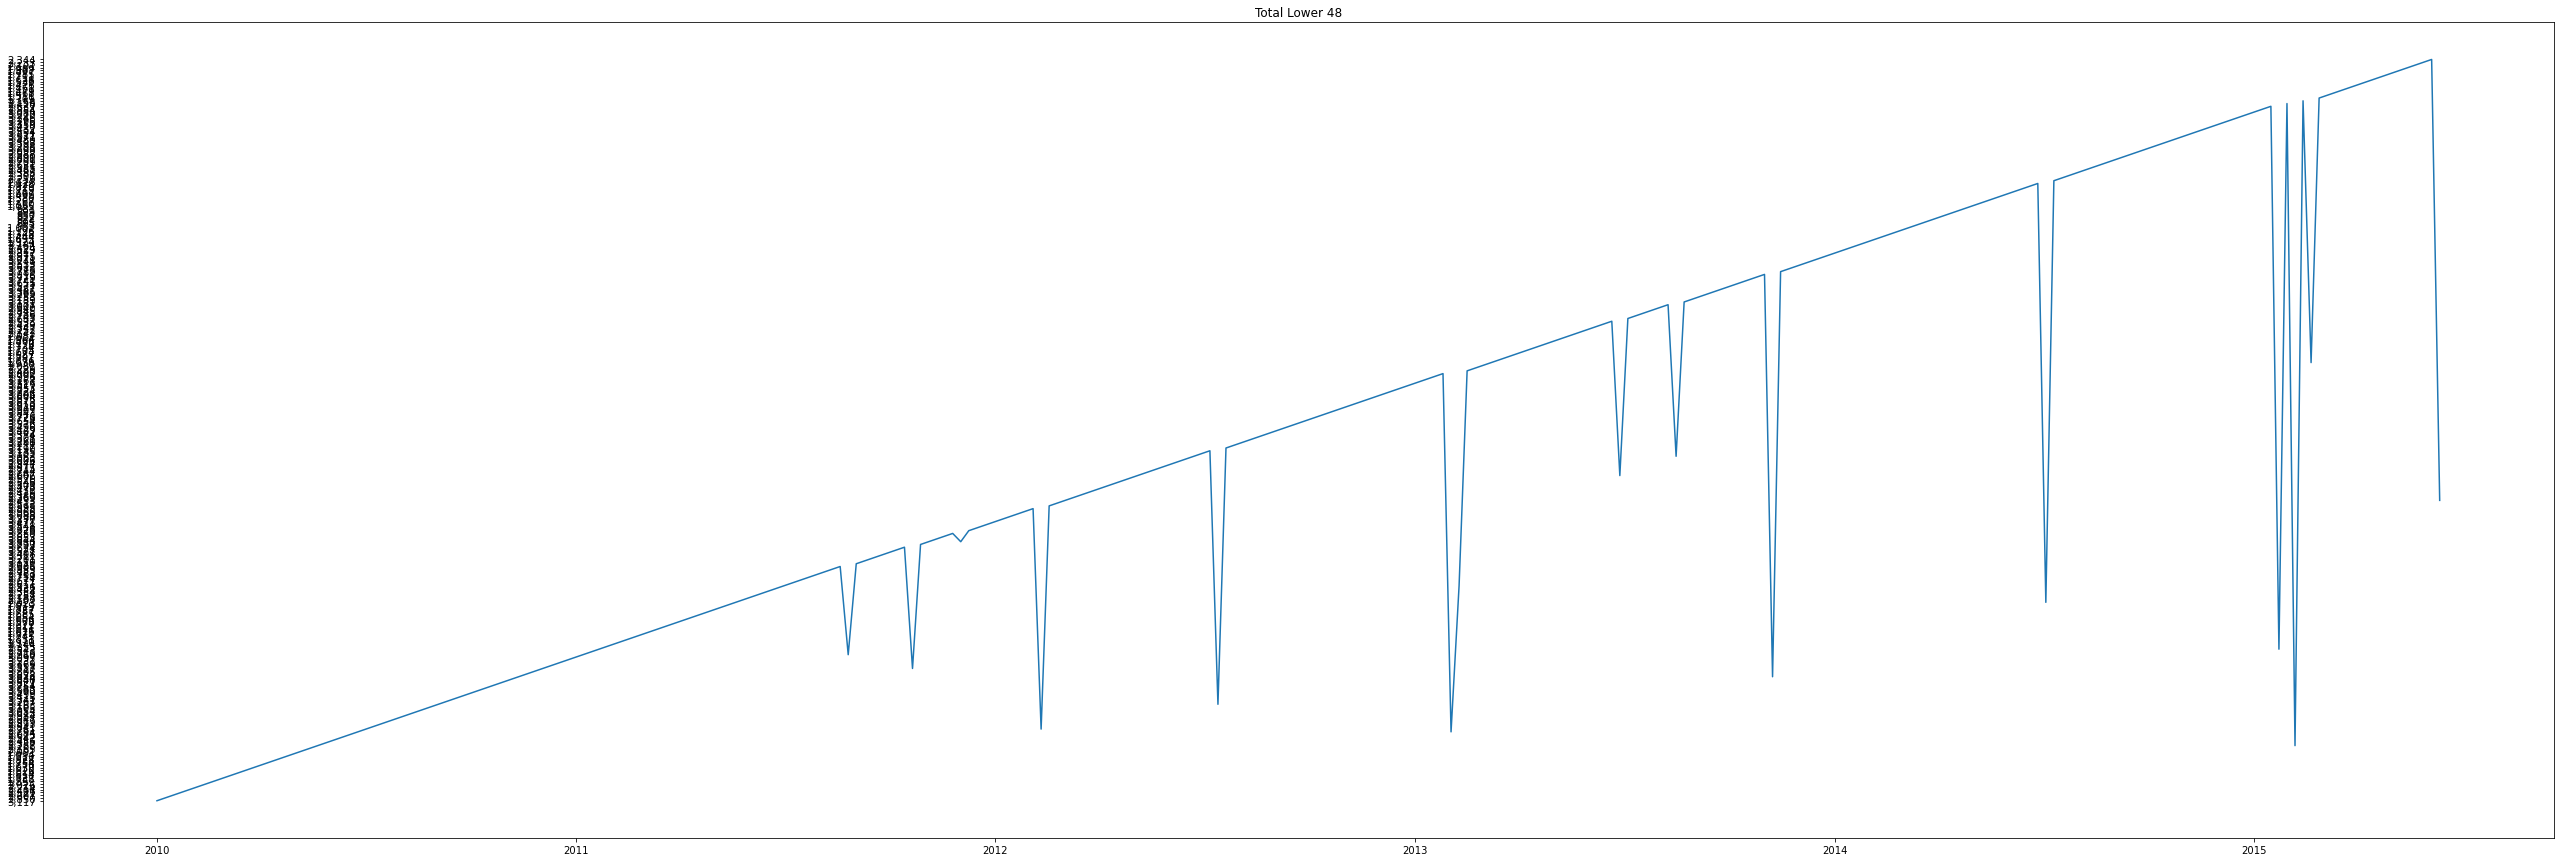

In [9]:
for col in cols:
    try:
        plt.figure(figsize=(45,15))
        plt.title(col)
        plt.plot(ngs_df[col])
        plt.show()
    except:
        print(col)

In [10]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

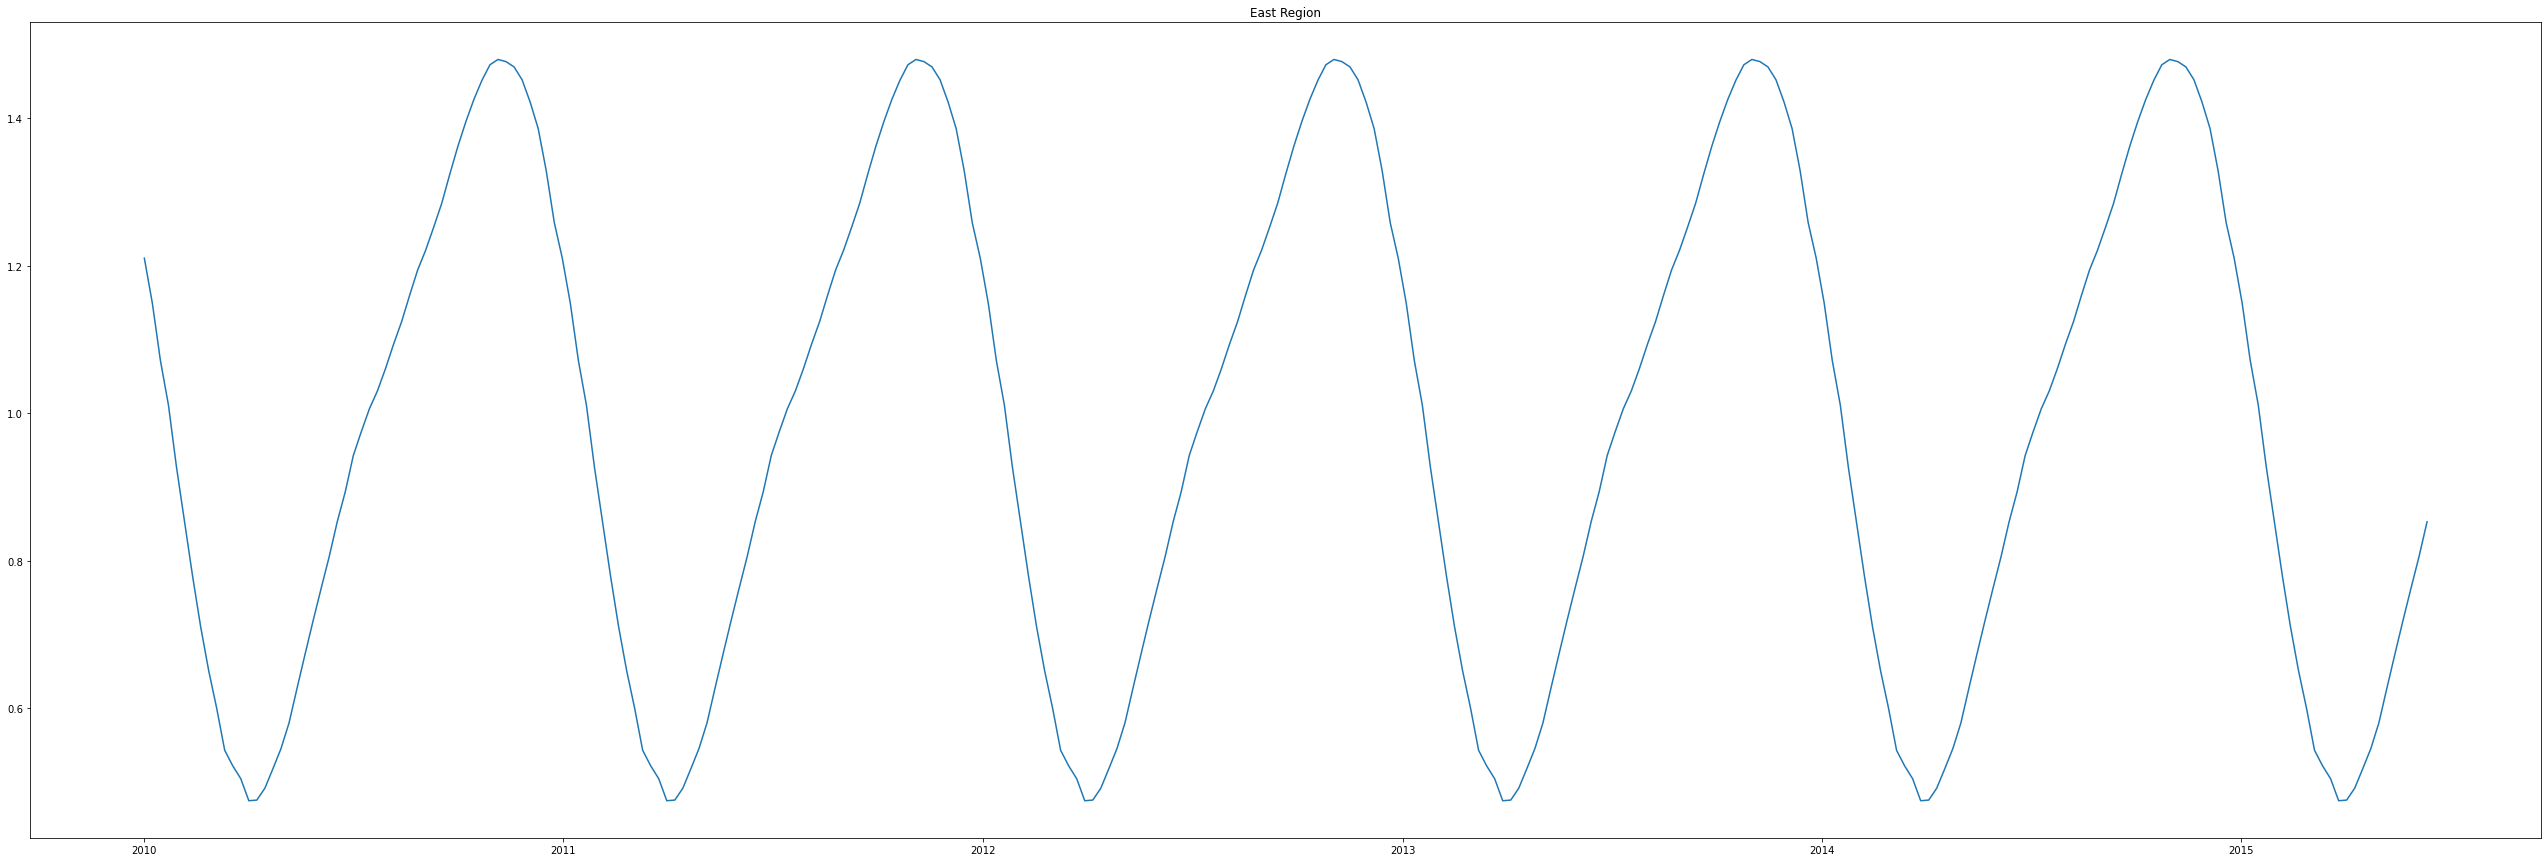

Midwest Region


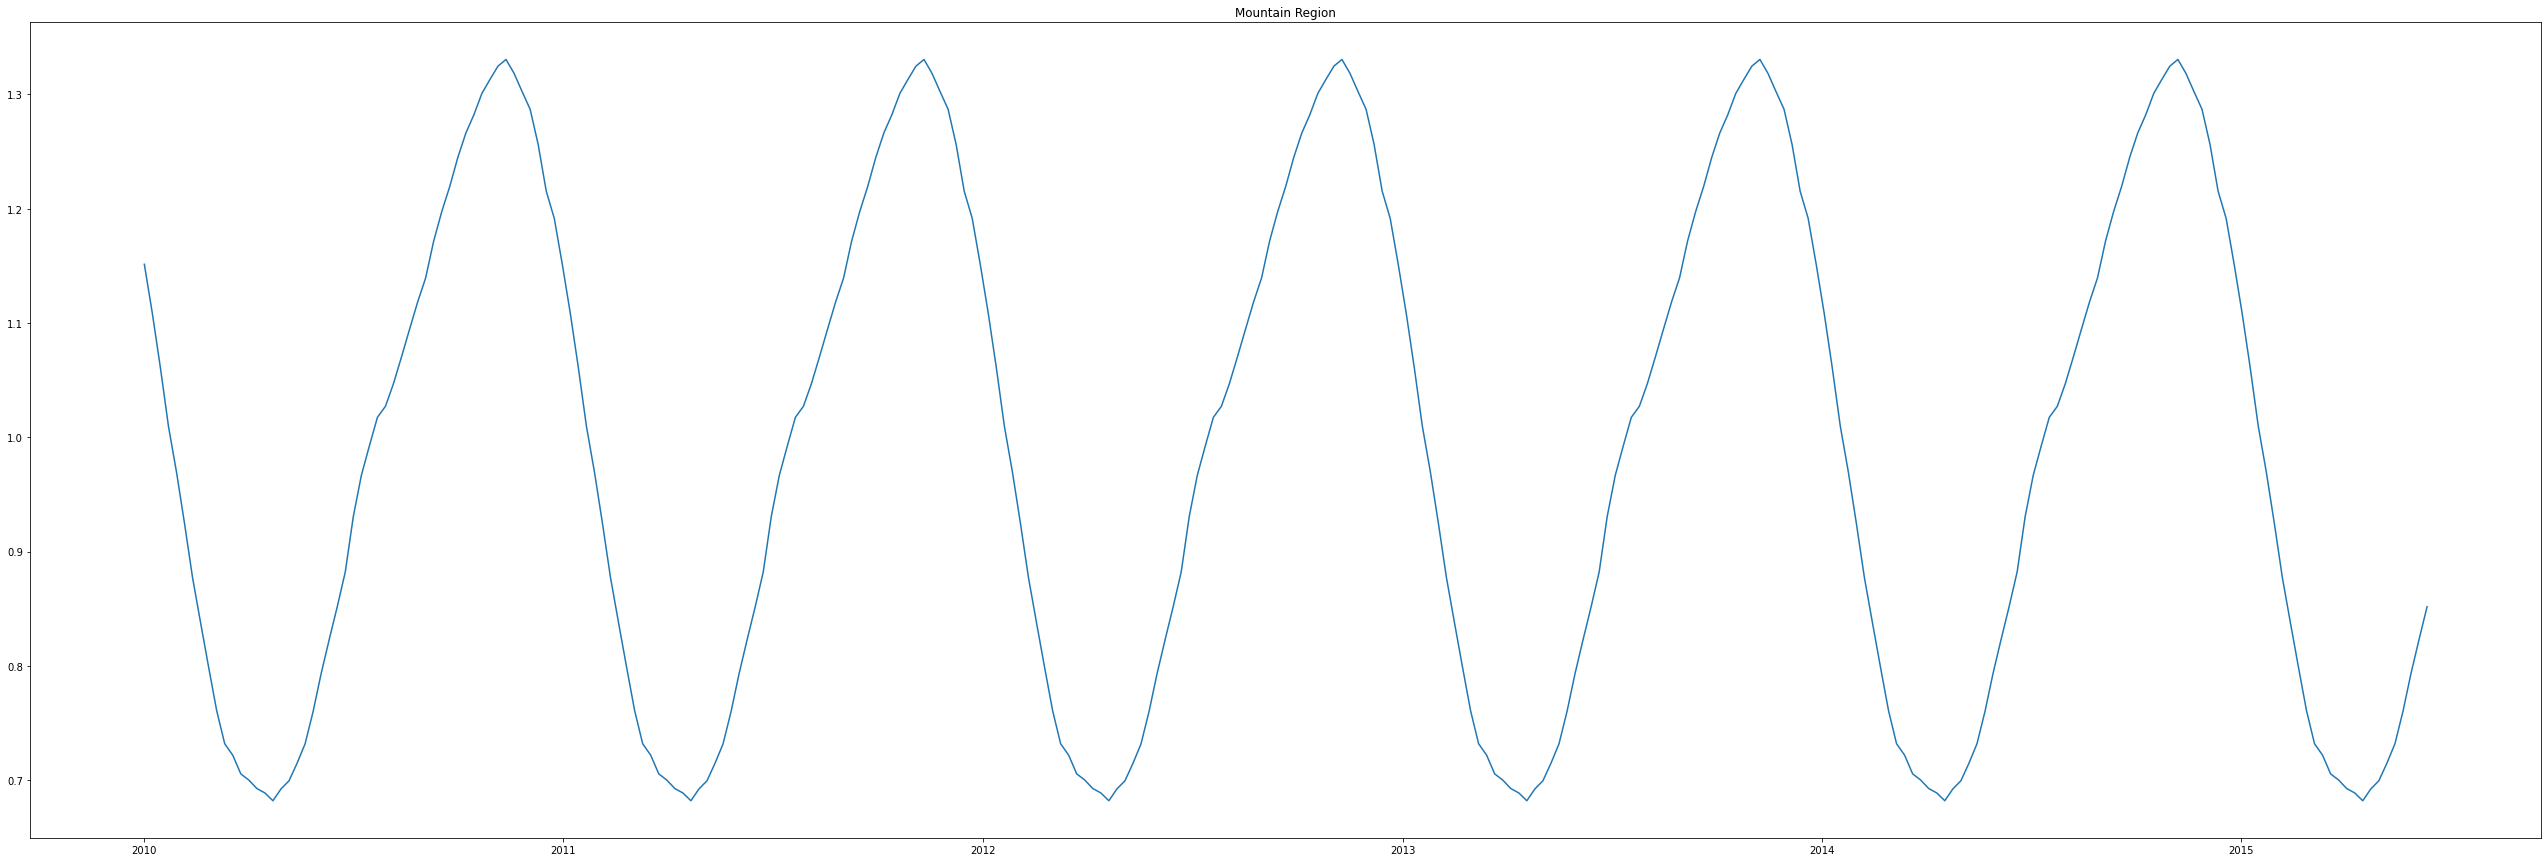

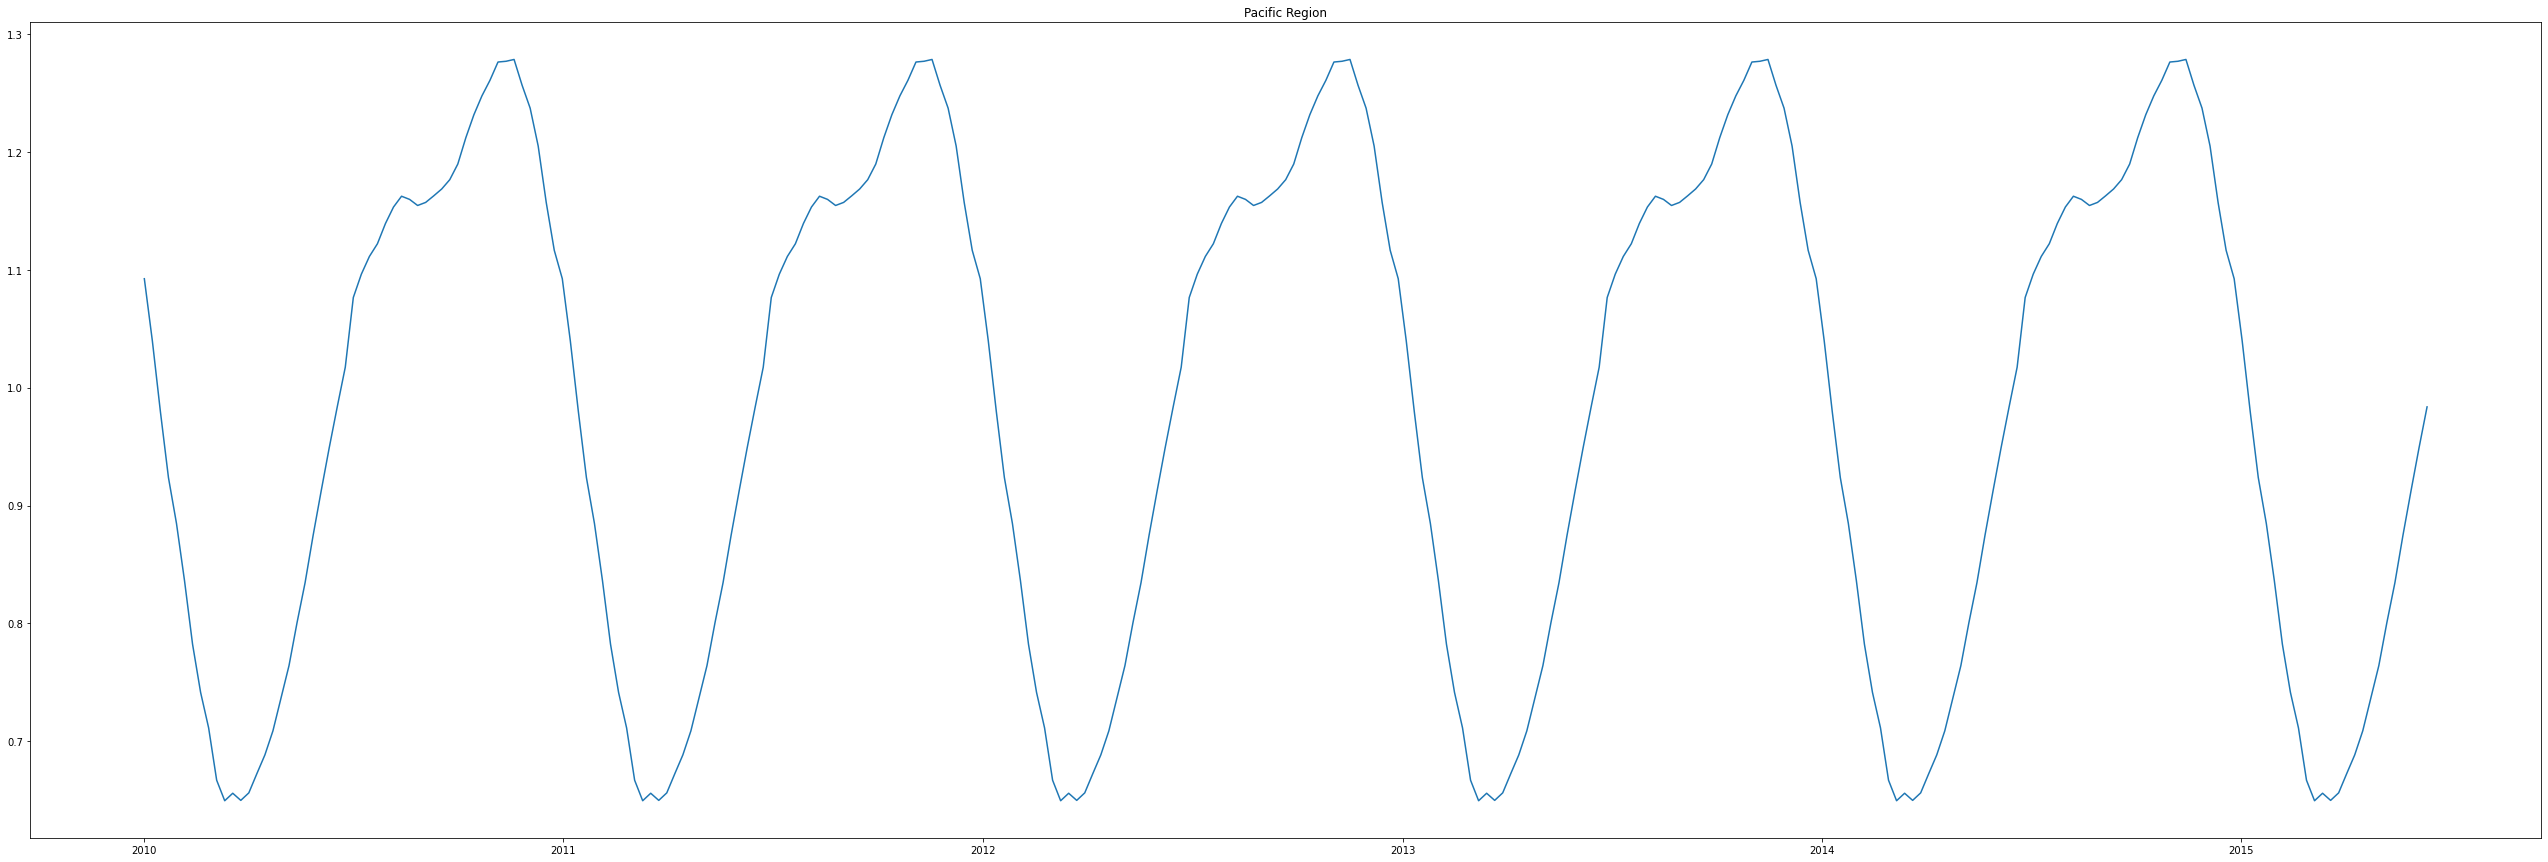

South Central Region
Total Lower 48


In [11]:
for col in cols:
    try:
        seasonal_result = seasonal_decompose(ngs_df[col], model="multiplicative",period=52)
        seasonal        = seasonal_result.seasonal
        plt.figure(figsize=(45,15))
        plt.title(col)
        plt.plot(seasonal)
        plt.show()
    except:
        print(col)

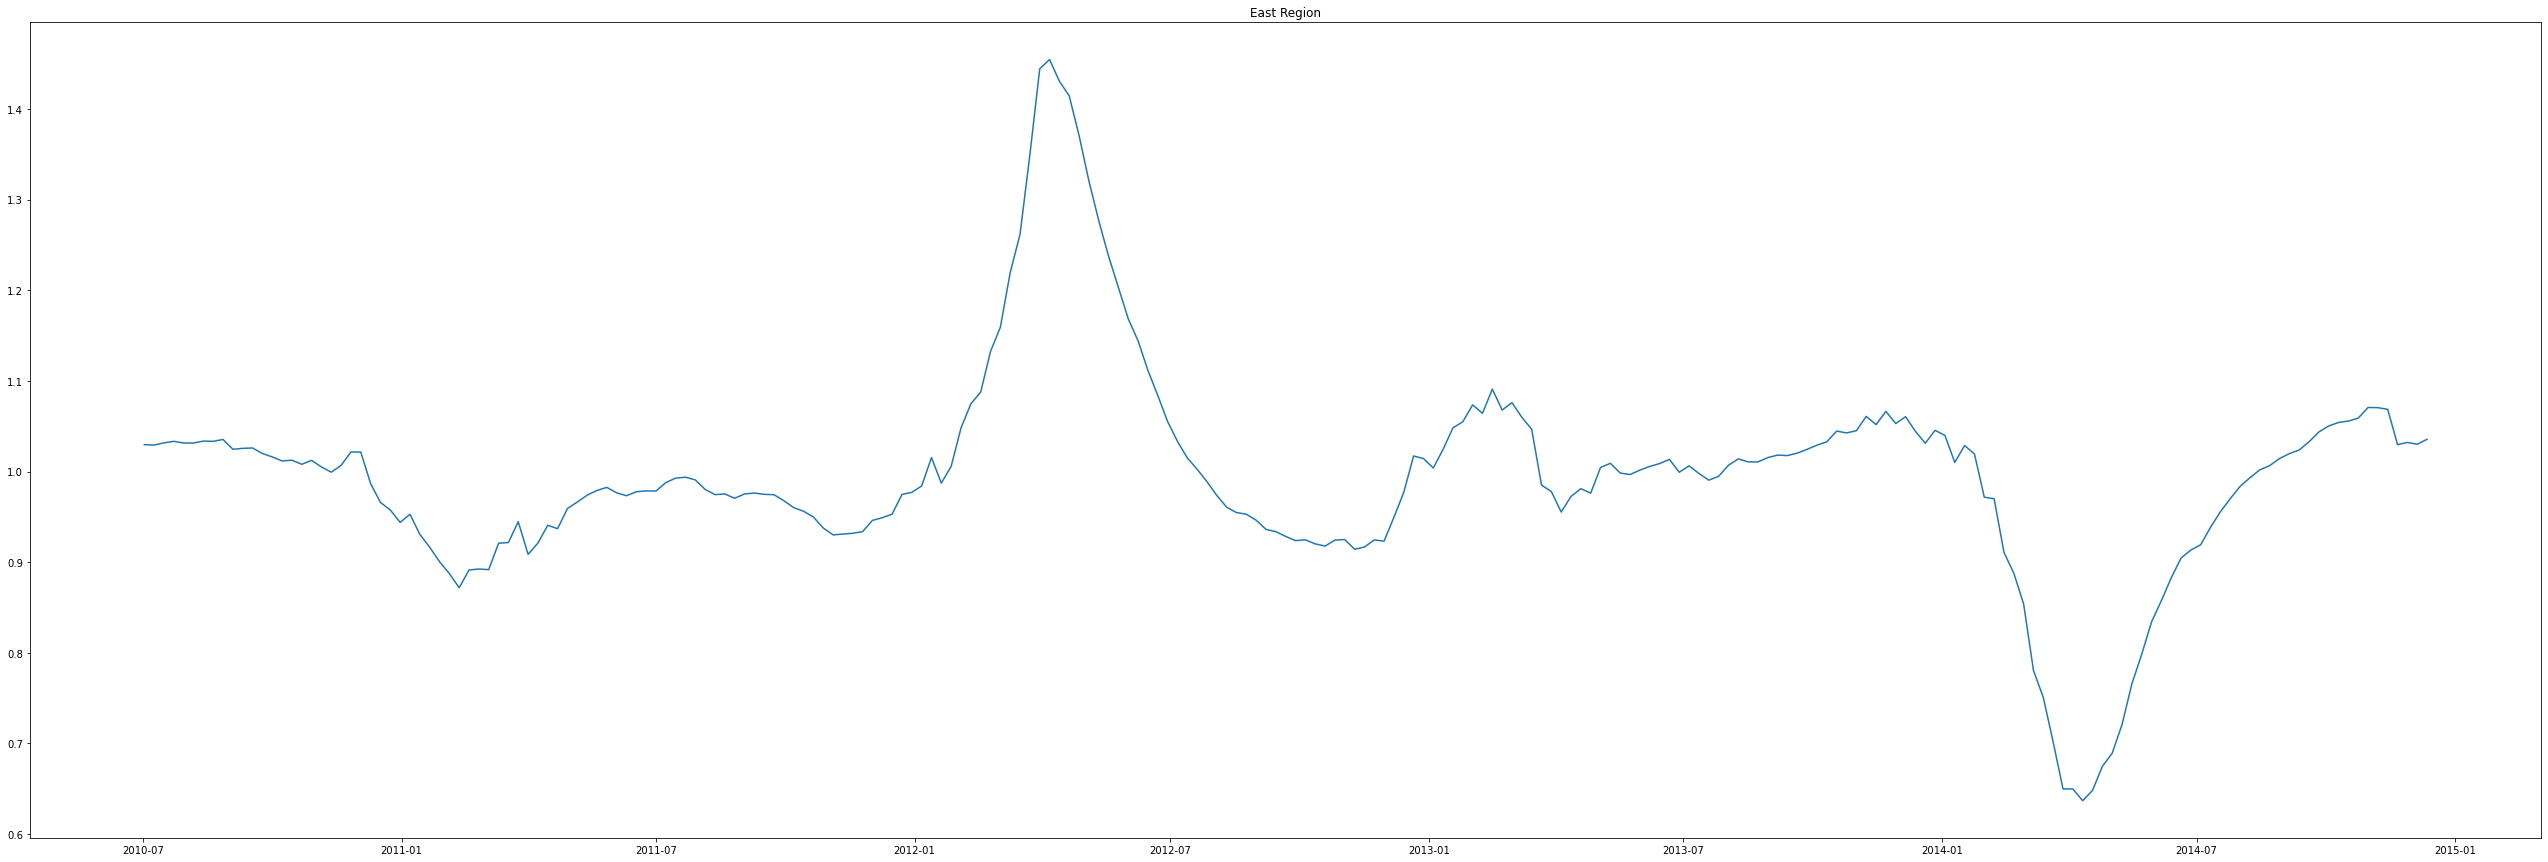

Midwest Region


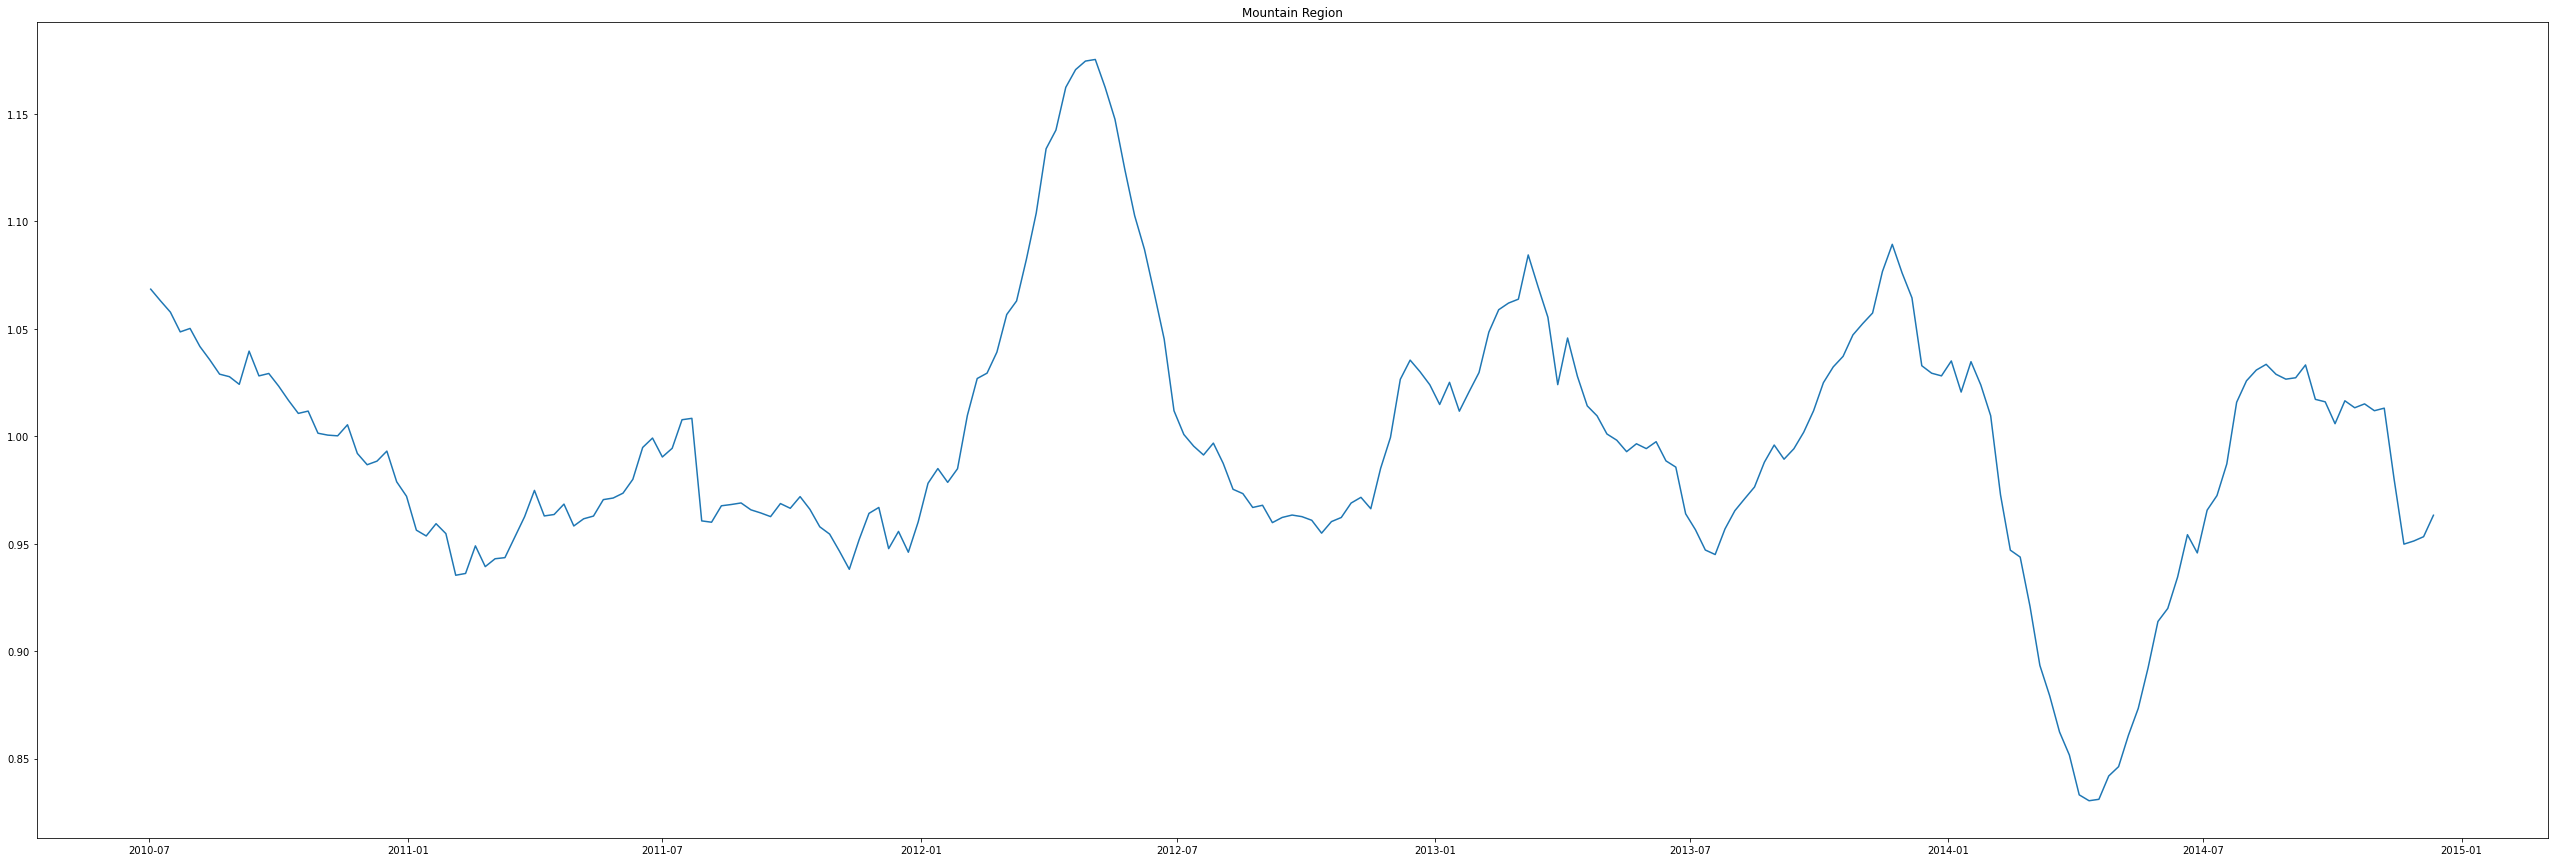

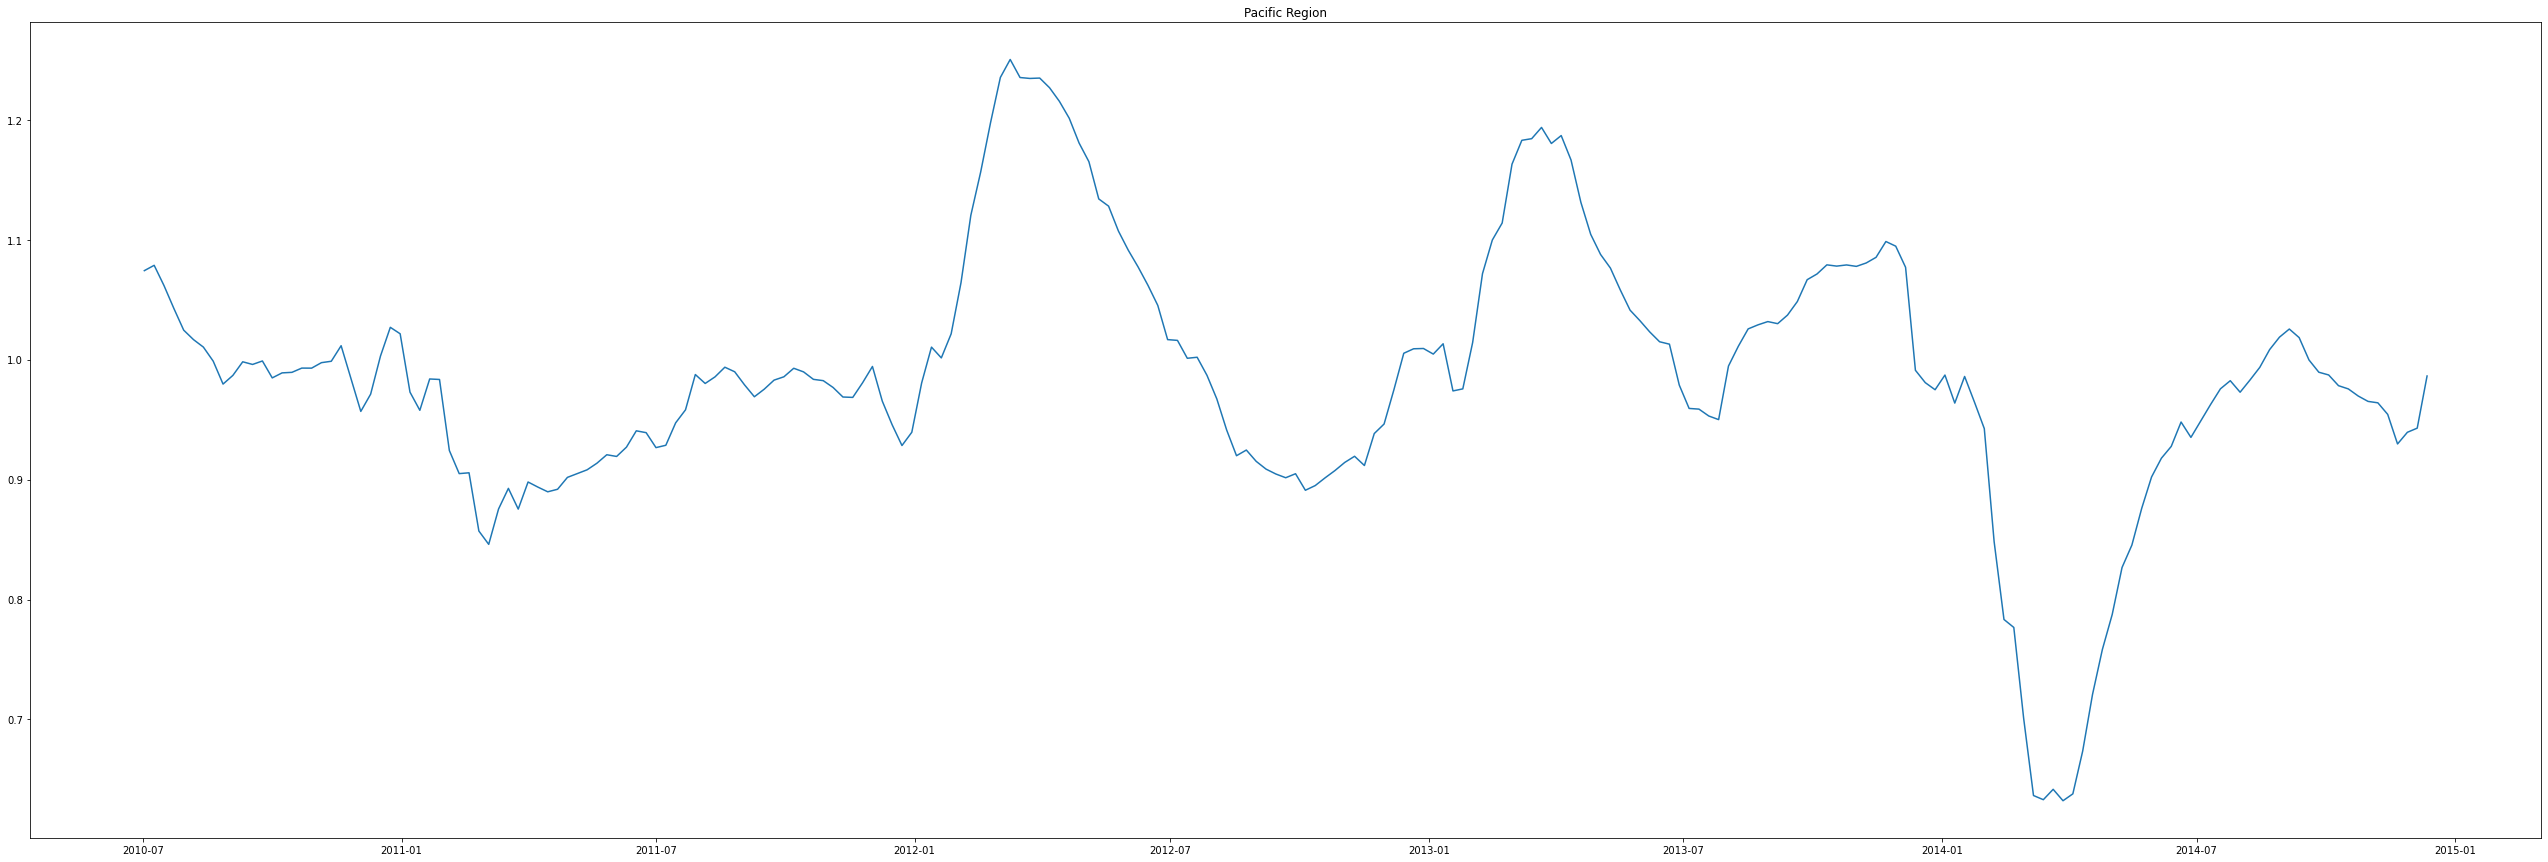

South Central Region
Total Lower 48


In [12]:
for col in cols:
    try:
        seasonal_result = seasonal_decompose(ngs_df[col], model="multiplicative",period=52)
        residual = seasonal_result.resid
        plt.figure(figsize=(45,15))
        plt.title(col)
        plt.plot(residual)
        plt.show()
    except:
        print(col)

Midwest Region
South Central Region
Total Lower 48


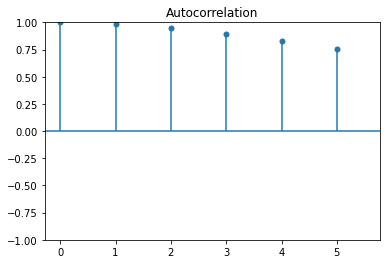

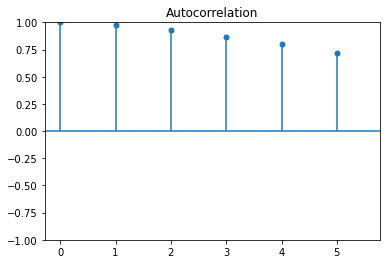

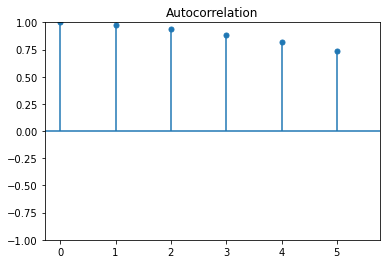

In [13]:
for col in cols:

    try:

        seasonal_result = seasonal_decompose(ngs_df[col], model="multiplicative",period=52)
        residual = seasonal_result.resid
        diff = residual.reset_index().dropna(axis=0)

        plot_acf(diff['resid'], alpha=1, lags=5).savefig(f"{col}.jpg")
    except:
        print(col)

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


ValueError: could not convert string to float: '1,011'

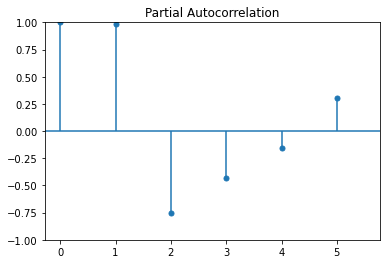

In [14]:
for col in cols:

    seasonal_result = seasonal_decompose(ngs_df[col], model="multiplicative",period=52)
    residual = seasonal_result.resid
    diff = residual.reset_index().dropna(axis=0)

    plot_pacf(diff['resid'], alpha=1, lags=5).savefig(f"{col}.jpg")